In [1]:
import tensorflow as tf
from tensorflow.keras import models

In [2]:
from tensorflow.keras import layers

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 10

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",shuffle=True,image_size=(IMAGE_SIZE,IMAGE_SIZE),batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [5]:
import matplotlib.pyplot as plt

In [6]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

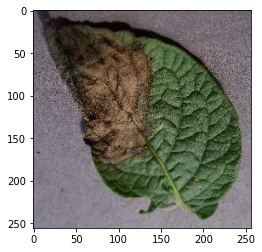

In [7]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))

In [8]:
def get_dataset_partition_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle_size = 10000):
    ds_size = len(ds)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds =  ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds
    

In [9]:
train_ds,val_ds,test_ds = get_dataset_partition_tf(dataset)

In [10]:
len(train_ds)

54

In [11]:
len(val_ds)

6

In [12]:
len(test_ds)

8

In [13]:
train_ds =train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [14]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [15]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [16]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3
model= models.Sequential([
    resize_and_rescale,data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(n_classes,activation="softmax")
])

In [17]:
model.build(input_shape=input_shape)

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [19]:
model.compile(
    optimizer="adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [20]:
history = model.fit(train_ds,epochs=EPOCHS,batch_size=BATCH_SIZE,verbose=1,validation_data=val_ds)

Epoch 1/10
54/54 [==============================] - 334s 6s/step - loss: 0.8437 - accuracy: 0.5637 - val_loss: 0.6158 - val_accuracy: 0.7344
Epoch 2/10
54/54 [==============================] - 352s 7s/step - loss: 0.4703 - accuracy: 0.8038 - val_loss: 0.3834 - val_accuracy: 0.7969
Epoch 3/10
54/54 [==============================] - 354s 7s/step - loss: 0.2980 - accuracy: 0.8779 - val_loss: 0.2511 - val_accuracy: 0.9062
Epoch 4/10
54/54 [==============================] - 304s 6s/step - loss: 0.2893 - accuracy: 0.8831 - val_loss: 0.3818 - val_accuracy: 0.8646
Epoch 5/10
54/54 [==============================] - 329s 6s/step - loss: 0.2639 - accuracy: 0.8941 - val_loss: 0.2419 - val_accuracy: 0.9010
Epoch 6/10
54/54 [==============================] - 309s 6s/step - loss: 0.2239 - accuracy: 0.9126 - val_loss: 0.2055 - val_accuracy: 0.9427
Epoch 7/10
54/54 [==============================] - 354s 7s/step - loss: 0.2272 - accuracy: 0.9097 - val_loss: 0.1833 - val_accuracy: 0.9115
Epoch 8/10
54

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss  = history.history['loss']
val_loss = history.history['val_loss']


Text(0.5, 1.0, 'Traing and Validation accuracy')

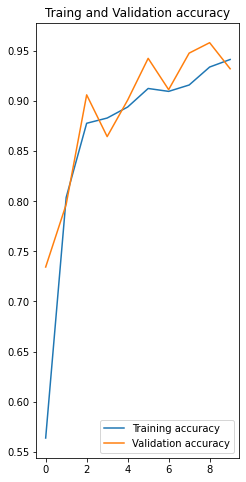

In [22]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Traing and Validation accuracy')

Text(0.5, 1.0, 'Training and Validation loss')

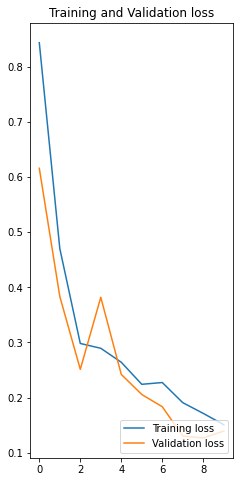

In [23]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),loss,label='Training loss')
plt.plot(range(EPOCHS),val_loss,label='Validation loss')
plt.legend(loc='lower right')
plt.title('Training and Validation loss')

First image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 1s 1s/step
Predicted label: Potato___Late_blight


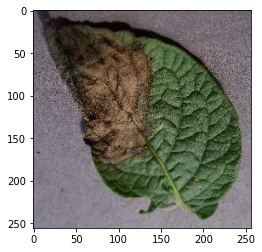

In [26]:
import numpy as np
for images_batch , labels_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print('First image to predict')
    plt.imshow(first_image)
    print('actual label:', class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print('Predicted label:' , class_names[np.argmax(batch_prediction[0])])

In [35]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence


1/1 [==============================] - 0s 57ms/step


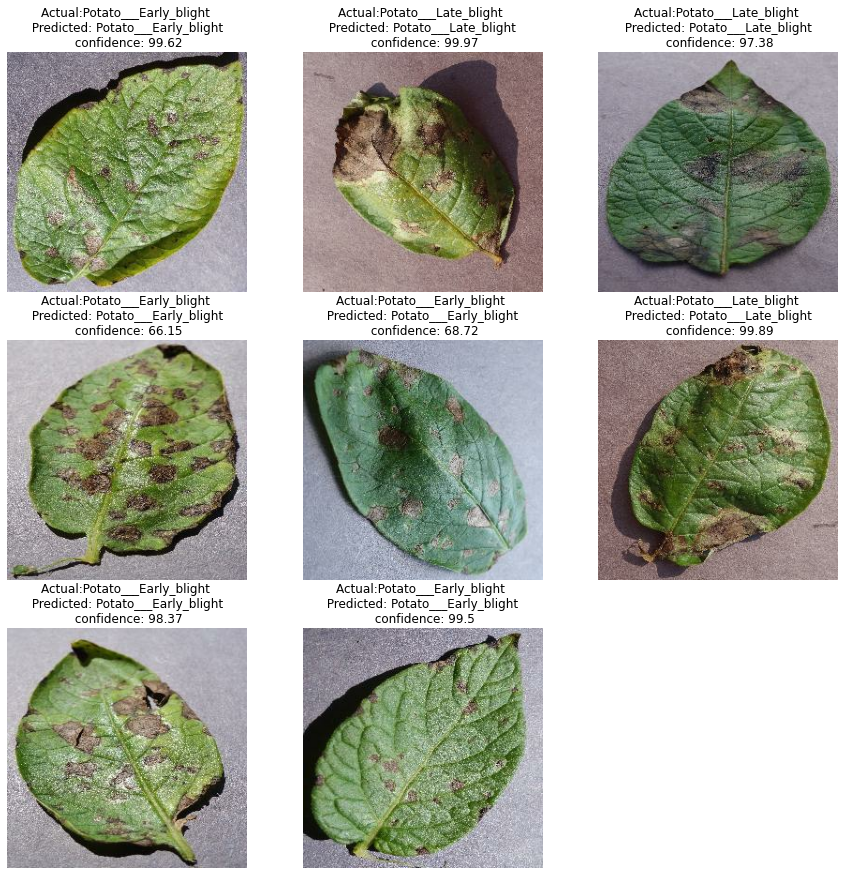

In [40]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(8):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class , confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual:{actual_class} \n Predicted: {predicted_class} \n confidence: {confidence}")
        plt.axis('off')
    

In [39]:
model_version = 1
model.save(f'../models/{model_version}')

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets
